In [2]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

#Image Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [5]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [6]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


#Create Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

#Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
#Layers),Output)

In [8]:
model = Sequential()

#Convolution

In [9]:

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

#MaxPooling

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten

In [11]:
model.add(Flatten())

# Dense - Hidden Layers

In [12]:
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))

#Dense-Output Layer

In [13]:
model.add(Dense(5,activation='softmax'))

#Compile The Model

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fit The Model

In [15]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
44/44 [==============================] - 40s 901ms/step - loss: 1.8910 - accuracy: 0.3711 - val_loss: 1.1964 - val_accuracy: 0.4809
Epoch 2/20
44/44 [==============================] - 41s 929ms/step - loss: 1.1088 - accuracy: 0.5603 - val_loss: 0.9968 - val_accuracy: 0.6074
Epoch 3/20
44/44 [==============================] - 39s 891ms/step - loss: 0.9614 - accuracy: 0.6213 - val_loss: 0.8103 - val_accuracy: 0.7012
Epoch 4/20
44/44 [==============================] - 39s 887ms/step - loss: 0.7917 - accuracy: 0.7088 - val_loss: 0.6151 - val_accuracy: 0.7971
Epoch 5/20
44/44 [==============================] - 39s 893ms/step - loss: 0.5996 - accuracy: 0.7973 - val_loss: 0.4662 - val_accuracy: 0.8691
Epoch 6/20
44/44 [==============================] - 39s 885ms/step - loss: 0.4256 - accuracy: 0.8684 - val_loss: 0.2957 - val_accuracy: 0.9261
Epoch 7/20
44/44 [==============================] - 41s 934ms/step - loss: 0.2803 - accuracy: 0.9182 - val_loss: 0.1926 - val_accuracy: 0.9571

#Save The Model

In [16]:
model.save('flowers.h5')

#Test The Model

In [17]:
from tensorflow.keras.preprocessing import image


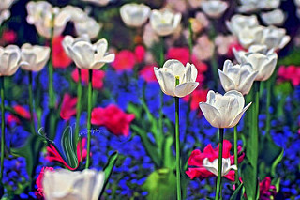

In [18]:

img = image.load_img('/content/flowers/tulip/19413898445_69344f9956_n.jpg',target_size=(200,300))
img

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/daisy/15813862117_dedcd1c56f_m.jpg',target_size=(60,60))
x = image.img_to_array(img)
x

array([[[220., 222., 219.],
        [219., 221., 218.],
        [220., 222., 219.],
        ...,
        [212., 213., 208.],
        [212., 213., 208.],
        [210., 213., 206.]],

       [[219., 221., 218.],
        [220., 222., 219.],
        [219., 221., 218.],
        ...,
        [212., 213., 208.],
        [211., 212., 207.],
        [210., 212., 207.]],

       [[220., 222., 219.],
        [220., 222., 219.],
        [220., 222., 219.],
        ...,
        [212., 213., 207.],
        [212., 213., 207.],
        [211., 212., 206.]],

       ...,

       [[134.,  97.,  70.],
        [135.,  98.,  71.],
        [133.,  96.,  69.],
        ...,
        [131.,  91.,  65.],
        [131.,  89.,  64.],
        [130.,  90.,  64.]],

       [[141., 104.,  77.],
        [142., 105.,  78.],
        [143., 106.,  79.],
        ...,
        [135.,  95.,  69.],
        [135.,  95.,  69.],
        [132.,  92.,  66.]],

       [[141., 104.,  77.],
        [140., 103.,  76.],
        [137., 1

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/flowers/tulip/19413898445_69344f9956_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
model.predict(x)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
xflowers.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [22]:
img = image.load_img('/content/flowers/tulip/19413898445_69344f9956_n.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
print(pred)
print(op[pred])

4
tulip
